## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## Data Preparation

In [2]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [3]:
# describe data
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [4]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [5]:
# check for missing values
df.isnull().sum()

Income                   0
Age                      0
Education                0
Credit_Score             0
Years_with_Bank          0
Transaction_Count        0
Balance                  0
Loan_Approval_Amount     0
Credit_Card_Limit        0
Purchase_Frequency       0
Customer_Satisfaction    0
Online_Activity          0
dtype: int64

Based on the result of the missing value check, there are no missing values found in the dataset. This indicates that all features are complete and contain valid data entries. Therefore, there is no need to perform any data imputation techniques such as filling missing values with the mean, median, or mode. Imputation is only necessary when missing or incomplete data exists, to ensure the dataset remains consistent and usable for further analysis.

In [6]:
# Display unique values for each column, show only first 10 if too many
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Unique values: {unique_vals[:10]}")


Column: Income
Number of unique values: 500
Unique values: [66161.01279 78639.20248 70207.25321 65866.23872 56774.10995 73442.05848
 57819.04084 91882.97506 97274.70704 53758.11391]

Column: Age
Number of unique values: 47
Unique values: [57 60 46 42 36 21 62 37 63 18]

Column: Education
Number of unique values: 4
Unique values: ['Bachelor' 'High School' 'PhD' 'Master']

Column: Credit_Score
Number of unique values: 328
Unique values: [503 779 519 834 410 768 430 420 651 484]

Column: Years_with_Bank
Number of unique values: 19
Unique values: [ 1  2 14 17 12 15  9  4 10 18]

Column: Transaction_Count
Number of unique values: 98
Unique values: [41 27 95 77 58 46 81 59 24 73]

Column: Balance
Number of unique values: 500
Unique values: [1968.919899  9797.056371  7024.173403  7992.359261   538.6910419
 7226.574153  4836.263058  7949.263177  7160.577123  1764.187614 ]

Column: Loan_Approval_Amount
Number of unique values: 500
Unique values: [ 2517.159284 31501.75884  16444.34158  45233.59

After checking the unique values for each column, all features in the dataset contain meaningful information related to customer characteristics and financial behavior. None of the columns serve as unique identifiers or contain constant values, which means they all contribute useful insights for clustering. Therefore, no columns need to be dropped, and all will be retained for further preprocessing and modeling.

In [9]:
# Encode the categorical variable 'Education' using Label Encoding
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

print("Encoded 'Education' column values:")
print(df['Education'].unique())

df.info()

Encoded 'Education' column values:
[0 1 3 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    int64  
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 47.0 KB


This code converts the Education column from categorical (e.g., “High School”, “Bachelor”, “Master”, “PhD”) into numeric labels (e.g., 0, 1, 2, 3).
After encoding, all features in the dataset become numeric, making the dataset ready for clustering.

## Exploratory Data Analysis

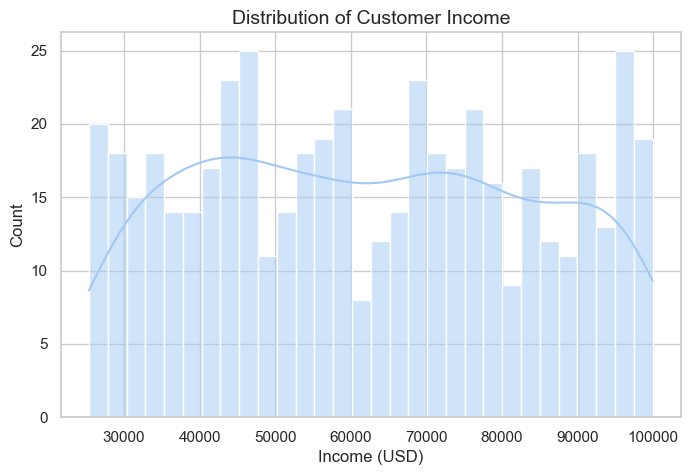

In [ ]:
# Histogram – Distribution of Income (to identify outliers)
plt.figure(figsize=(8,5))
sns.histplot(df["Income"], bins=30, kde=True)
plt.title("Distribution of Customer Income", fontsize=14)
plt.xlabel("Income (USD)")
plt.ylabel("Count")
plt.show()

This histogram displays the Distribution of Customer Income in US Dollars (USD), with the count of customers represented on the Y-axis and the income on the X-axis. The data appears to show a somewhat multimodal distribution, meaning there are several peaks, rather than a single distinct peak like a normal distribution. Specifically, the data has notable clusters of higher customer counts around the $40,000 to $50,000 range, the $70,000 to $80,000 range, and the $95,000 to $100,000 range. There is a broader trend where counts are generally higher between $40,000 and $80,000, before showing a drop-off towards the upper limit, though the very highest income bin around $100,000 shows a significant final peak. The lowest counts appear in the middle ranges, specifically around $60,000 and $90,000, suggesting that while customers are widely distributed across the income spectrum shown, they tend to cluster into these distinct income brackets.

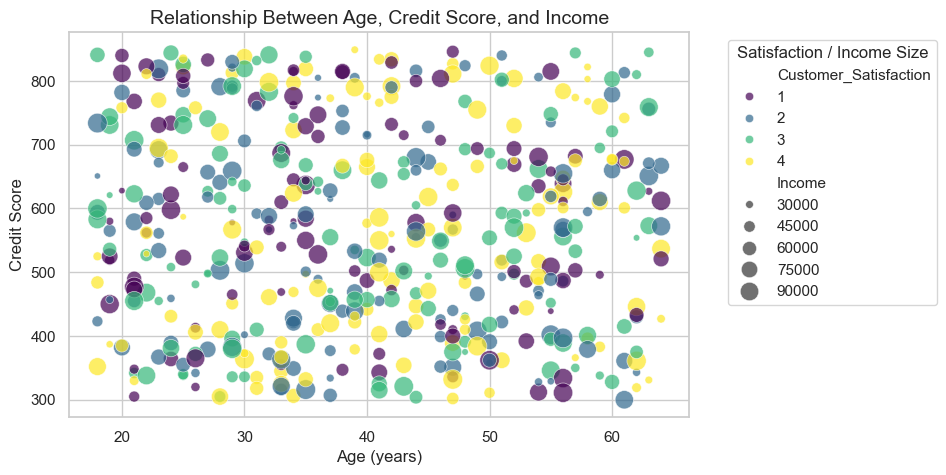

In [14]:
# Scatterplot – Relationship Between Age, Credit Score, and Income
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="Age",
    y="Credit_Score",
    size="Income",
    hue="Customer_Satisfaction",
    data=df,
    palette="viridis",
    alpha=0.7,
    sizes=(20, 200)
)
plt.title("Relationship Between Age, Credit Score, and Income", fontsize=14)
plt.xlabel("Age (years)")
plt.ylabel("Credit Score")
plt.legend(title="Satisfaction / Income Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This scatterplot illustrates the relationship between Age and Credit Score, with point color representing Customer Satisfaction and point size representing Income. The pattern suggests that older customers generally tend to have higher credit scores and incomes, while younger customers show greater variation in credit scores and satisfaction levels. The lighter-colored, larger points (indicating higher income and satisfaction) are more concentrated in the higher age and credit score range. This implies that financial stability and customer satisfaction tend to increase with age and income, which could help the bank identify mature, high-value customer segments for premium or loyalty-focused offers.

## Clustering Modeling

In [38]:
df_scaled = df.copy()

# Hanya scale fitur numerik yang bersifat kontinu
numeric_cols = ['Income', 'Age', 'Credit_Score', 'Years_with_Bank',
                'Transaction_Count', 'Balance', 'Loan_Approval_Amount',
                'Credit_Card_Limit', 'Purchase_Frequency', 
                'Customer_Satisfaction', 'Online_Activity']

# Scaling hanya fitur kontinu
scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Buat dataset unscaled (tetap sama seperti asli)
df_unscaled = df.copy()

print("Scaled dataset:")
display(df_scaled.head())
print("Unscaled dataset:")
display(df_unscaled.head())

Scaled dataset:


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,0.179150,1.303097,0,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013
1,0.749977,1.533191,1,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427
2,0.364249,0.459420,1,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595
3,0.165665,0.152629,1,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907
4,-0.250263,-0.307558,0,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898


Unscaled dataset:


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In this case, StandardScaler is used instead of MinMaxScaler because the dataset contains several numerical features with different units and wide value ranges (eg., income in thousands of dollars, satisfaction on a 1–10 scale, and years with the bank in single digits). StandardScaler transforms each feature to have a mean of 0 and a standard deviation of 1, which ensures that all features contribute equally to the clustering process without being dominated by variables with larger scales. This approach is particularly suitable for algorithms like Hierarchical Clustering that rely on distance metrics (such as Euclidean distance), as it preserves the shape of the data distribution better than MinMaxScaler. Meanwhile, MinMaxScaler compresses data into a fixed range (usually 0–1), which can sometimes distort relationships between features, especially when outliers are present.

In [39]:
# get stastical information on the new dataset
df_scaled.describe()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.158274e-16,1.421085e-16,1.432000,2.593481e-16,1.598721e-16,9.237056e-17,-3.392842e-16,-1.918465e-16,4.085621e-17,1.492140e-16,-4.973799e-17,-8.171241e-17
std,1.001002e+00,1.001002e+00,1.109883,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.687691e+00,-1.688120e+00,0.000000,-1.666120e+00,-1.905592e+00,-1.653782e+00,-1.716418e+00,-1.706699e+00,-1.723224e+00,-1.811333e+00,-1.421875e+00,-1.676552e+00
25%,-8.535233e-01,-8.444436e-01,0.000000,-8.739031e-01,-7.396169e-01,-8.179404e-01,-8.547889e-01,-8.524396e-01,-8.660940e-01,-8.511311e-01,-5.127476e-01,-8.654451e-01
50%,-3.347132e-02,-7.746485e-02,1.000000,-1.881200e-02,3.769986e-02,-1.692579e-02,-3.416637e-02,8.970695e-03,1.912909e-02,6.587104e-02,3.963794e-01,-3.124291e-02
75%,8.033504e-01,8.429096e-01,2.000000,7.985545e-01,8.150166e-01,8.189156e-01,8.593735e-01,9.102263e-01,8.839671e-01,8.868705e-01,1.305506e+00,8.997453e-01
max,1.723192e+00,1.839982e+00,3.000000,1.785682e+00,1.592333e+00,1.759237e+00,1.683474e+00,1.725528e+00,1.681174e+00,1.702529e+00,1.305506e+00,1.717971e+00


In [40]:
df_unscaled.describe()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,1.432000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,1.109883,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,0.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,0.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,1.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,2.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,3.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


## Silhouette Score

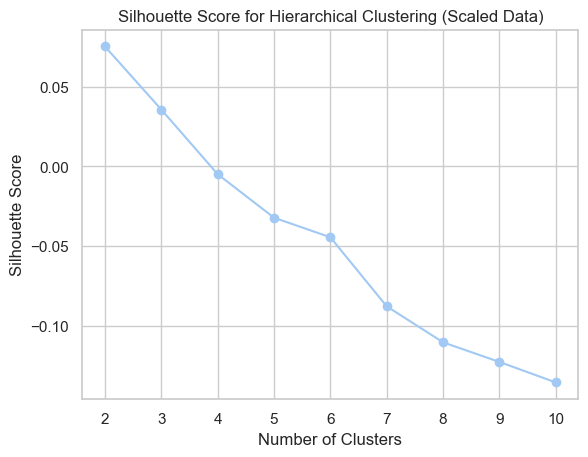

In [41]:
# Scaled
from sklearn.metrics import silhouette_score

# Gunakan hanya kolom numerik untuk clustering
X_scaled = df_scaled[numeric_cols]

silhouette_scores = []

# Uji jumlah cluster dari 2 sampai 10
for i in range(2, 11):
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Hierarchical Clustering (Scaled Data)")
plt.grid(True)
plt.show()

The plot displays the Silhouette Score as a function of the Number of Clusters (from 2 to 10) for a hierarchical clustering model applied to scaled data using the single linkage method. The Silhouette Score is a metric used to evaluate the quality of clustering, where a value closer to +1 indicates well-separated clusters, a value near 0 indicates overlapping clusters, and a value closer to -1 indicates that data points have been assigned to the wrong clusters. Based on the graph, the highest score is achieved when the number of clusters is k=2, which has the only positive score (approximately 0.065). As the number of clusters increases, the score rapidly decreases, dropping below zero for k≥4 and continuing to decline to its lowest point around −0.12 at k=10. This suggests that two clusters provide the best-defined and most well-separated grouping based on this metric and linkage method, and increasing the number of clusters beyond four results in increasingly poor clustering quality.

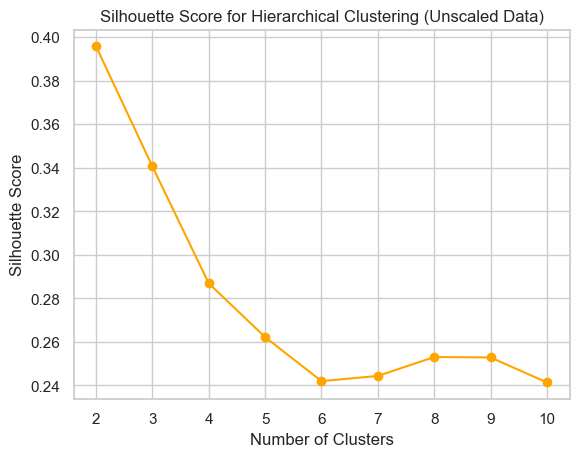

In [42]:
# Unscaled
X_unscaled = df_unscaled[numeric_cols]

silhouette_scores_unscaled = []

for i in range(2, 11):
    agglo_model_unscaled = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels_unscaled = agglo_model_unscaled.fit_predict(X_unscaled)
    silhouette_avg_unscaled = silhouette_score(X_unscaled, cluster_labels_unscaled)
    silhouette_scores_unscaled.append(silhouette_avg_unscaled)

plt.plot(range(2, 11), silhouette_scores_unscaled, marker='o', color='orange')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Hierarchical Clustering (Unscaled Data)")
plt.grid(True)
plt.show()

This plot shows the Silhouette Score against the Number of Clusters (from 2 to 10) for hierarchical clustering applied to unscaled data using the Ward linkage method. Unlike the previous plot, all silhouette scores here are positive, indicating that the clusters are reasonably separated, even for the unscaled data. The plot exhibits a clear pattern: the score is highest at k=2 (approximately 0.40), suggesting that two clusters provide the strongest separation and most compact groupings. As the number of clusters increases, the score rapidly declines, reaching a local minimum at k=6 (around 0.24). After k=6, the score slightly increases and stabilizes between k=7 and k=9 (around 0.25), before decreasing again at k=10. Based on the silhouette criterion, the optimal number of clusters for the unscaled data with Ward linkage is k=2, as it yields the maximum separation score.

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


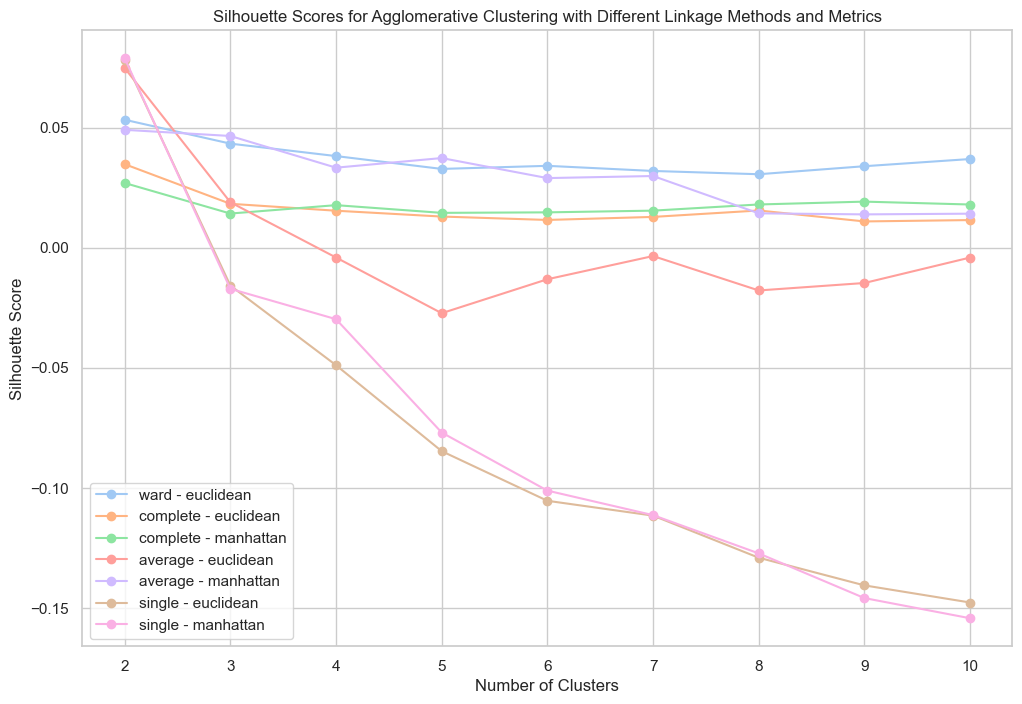

Best Silhouette Score: 0.07892117750281943
Optimal Number of Clusters: 2
Optimal Linkage Method: single
Optimal Metric: manhattan


In [43]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

This paragraph summarizes the findings from the preceding analyses, comparing the Silhouette Scores for Agglomerative Clustering using various linkage methods and distance metrics (Euclidean and Manhattan) over 2 to 10 clusters on scaled data. The overall highest Silhouette Score recorded is approximately 0.079 at k=2 clusters, achieved by the combination of Single linkage and the Manhattan metric (single - manhattan). This combination is mathematically deemed the most optimal for creating well-separated and compact clusters based on this evaluation metric. However, it is important to note that a score of 0.079 is quite close to zero, suggesting that while the two clusters are the best separated relative to the other options, the overall cluster quality is marginal, with significant overlap remaining. The plot further reveals that the Single linkage methods show the steepest decline in quality (dropping into negative scores) as the number of clusters increases beyond k=3, while methods like Ward - Euclidean, Complete - Manhattan, and Average - Manhattan maintain generally positive but low scores, indicating more stable but less separated clustering across the range.

## Dendogram Visualization

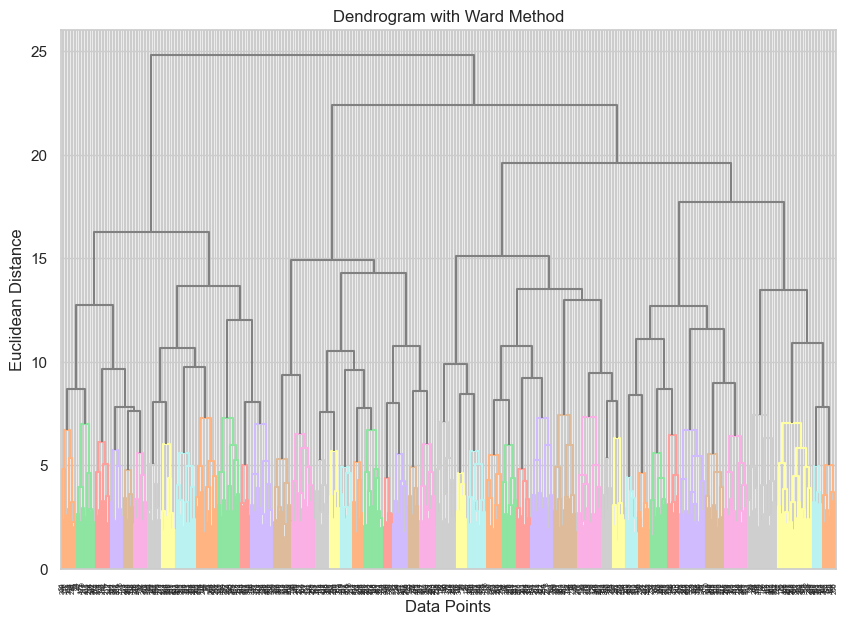

In [44]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

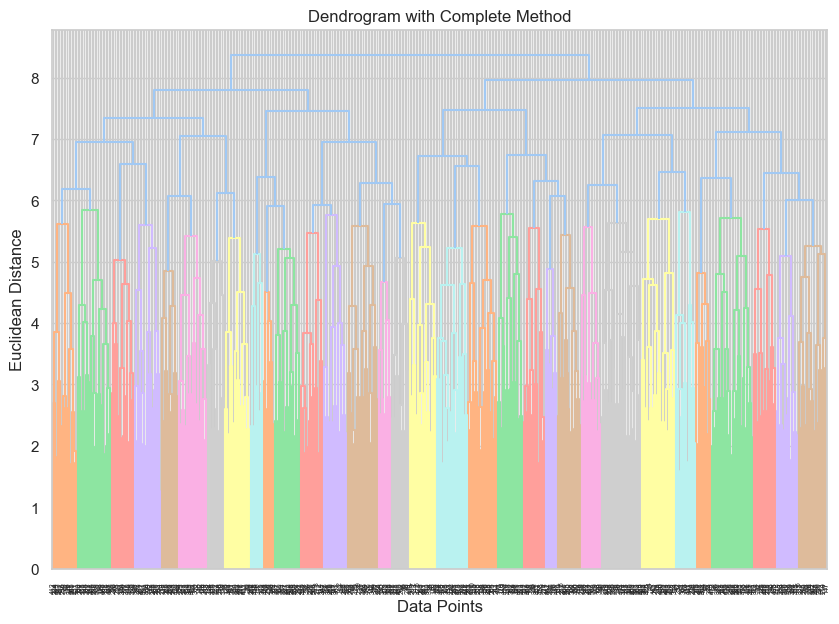

In [46]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

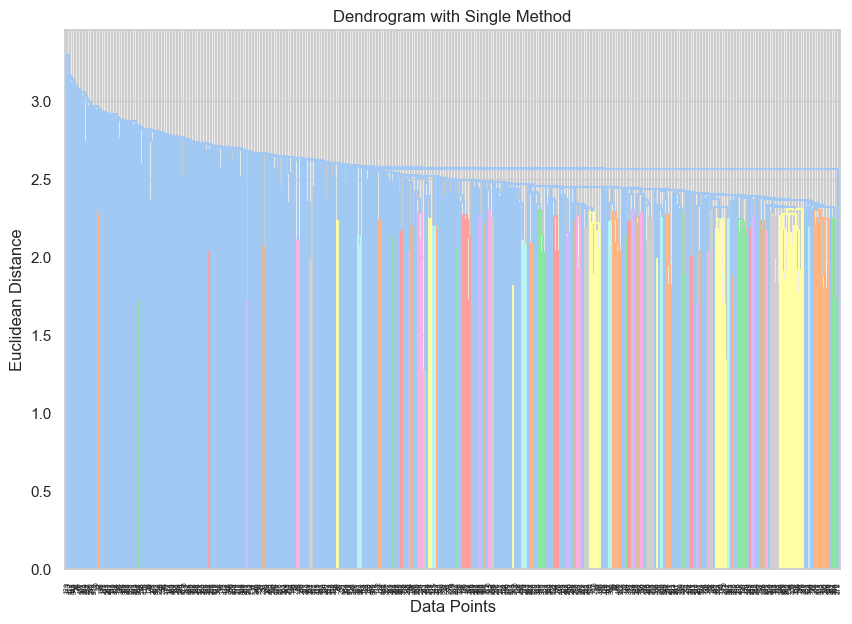

In [47]:
# Min Distance
linked = linkage(df_scaled, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

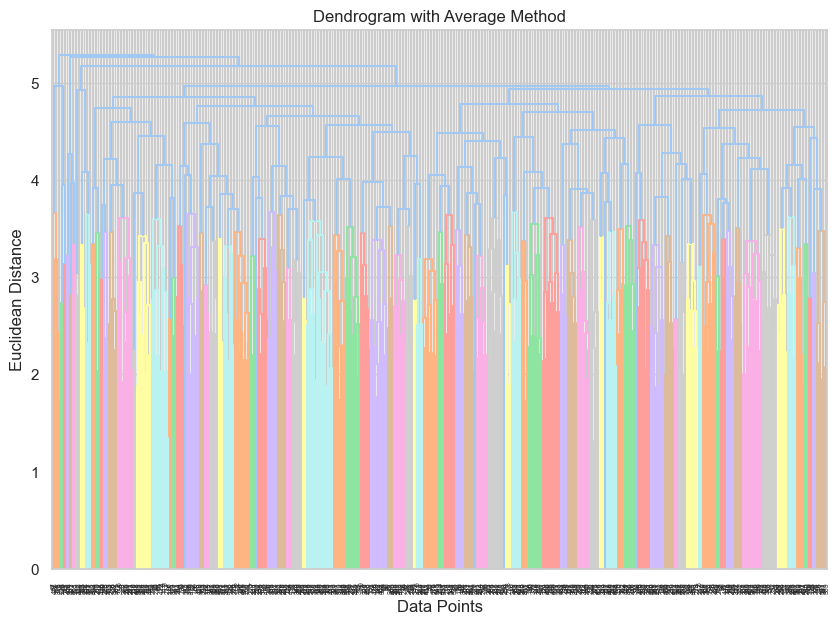

In [48]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [49]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [50]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.07892117750281943


## Dendogram Visualization for Hierarchical Clustering Model

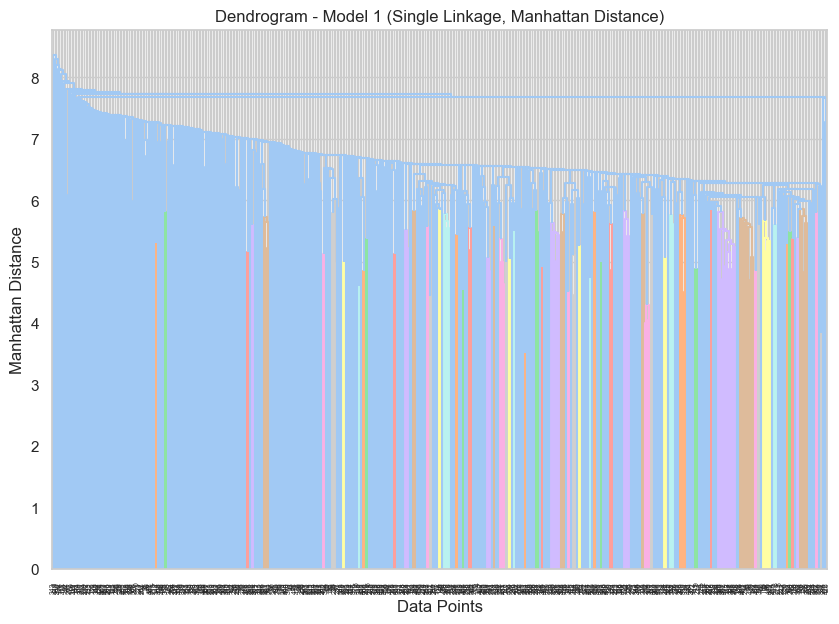

In [59]:
linked_single_manhattan = linkage(df_scaled, method='single', metric='cityblock')

plt.figure(figsize=(10, 7))
sch.dendrogram(linked_single_manhattan)
plt.title("Dendrogram - Model 1 (Single Linkage, Manhattan Distance)")
plt.xlabel("Data Points")
plt.ylabel("Manhattan Distance")
plt.show()

## Merge with the original data

In [61]:
# Model on Scaled Data
agglo_scaled = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
df['Cluster_Scaled'] = agglo_scaled.fit_predict(df_scaled)

# Model on Unscaled Data
agglo_unscaled = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
df['Cluster_Unscaled'] = agglo_unscaled.fit_predict(df_unscaled[numeric_cols])

sil_scaled = silhouette_score(df_scaled, df['Cluster_Scaled'])
sil_unscaled = silhouette_score(df_unscaled[numeric_cols], df['Cluster_Unscaled'])

print(f"Silhouette Score (Scaled): {sil_scaled:.4f}")
print(f"Silhouette Score (Unscaled): {sil_unscaled:.4f}")

print("\nPreview of dataset with both cluster labels:")
display(df.head())

print("\nCluster distribution (Scaled):")
print(df['Cluster_Scaled'].value_counts())

print("\nCluster distribution (Unscaled):")
print(df['Cluster_Unscaled'].value_counts())


Silhouette Score (Scaled): 0.0789
Silhouette Score (Unscaled): 0.1595

Preview of dataset with both cluster labels:


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Cluster_Scaled,Cluster_Unscaled
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0,0
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0,0
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,0
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0,0
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0,0



Cluster distribution (Scaled):
Cluster_Scaled
0    499
1      1
Name: count, dtype: int64

Cluster distribution (Unscaled):
Cluster_Unscaled
0    499
1      1
Name: count, dtype: int64


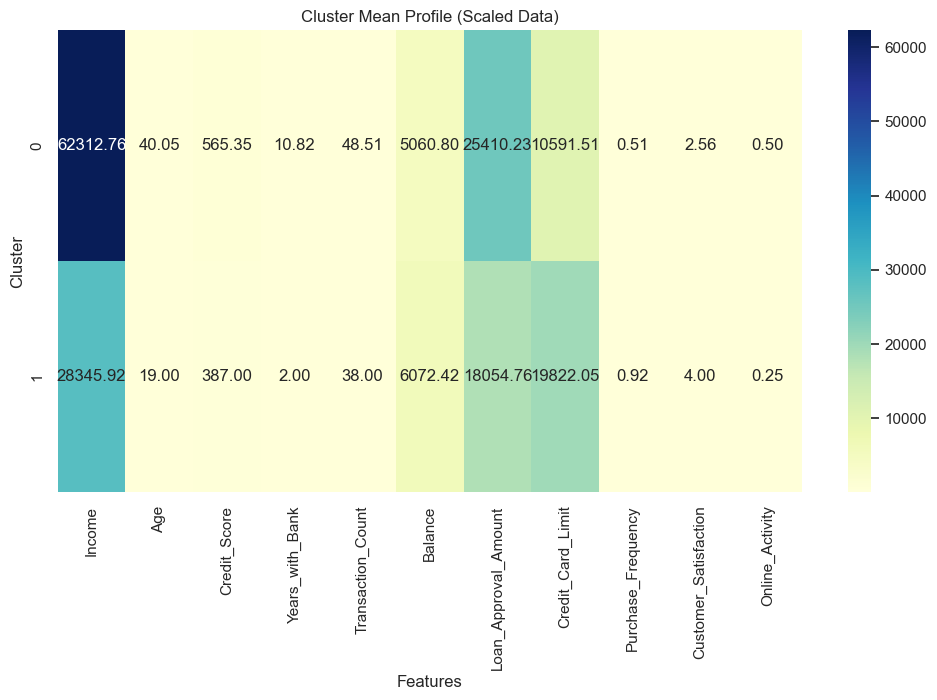

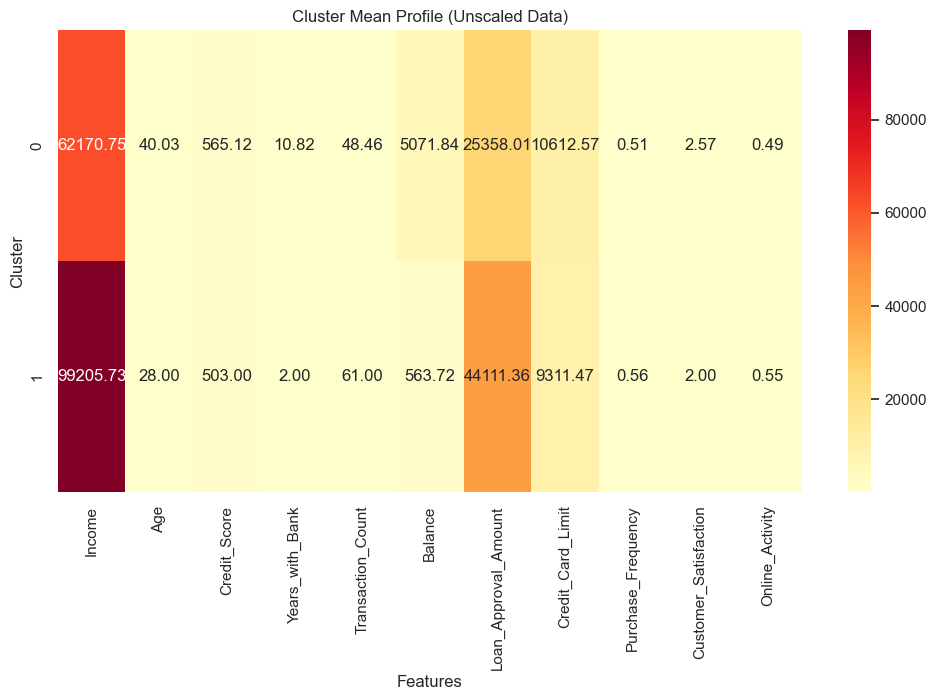

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung mean tiap numeric feature per cluster (scaled)
cluster_profile_scaled = df.groupby('Cluster_Scaled')[numeric_cols].mean()

# Heatmap visualisasi
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile_scaled, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Cluster Mean Profile (Scaled Data)")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

# Untuk unscaled data
cluster_profile_unscaled = df.groupby('Cluster_Unscaled')[numeric_cols].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile_unscaled, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Cluster Mean Profile (Unscaled Data)")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

The two heatmaps display the mean profiles for the two clusters (k=2) identified using hierarchical clustering on both Unscaled and Scaled versions of the data, revealing that scaling significantly changes the composition of the clusters. In the Unscaled Data profile (top, red/yellow colormap), Cluster 1 is clearly characterized by very high Income ($99,206), high Loan Approval Amount ($44,111), and high Credit Card Limit ($9,311), suggesting a segment of high-earning, high-spending customers. In contrast, the Scaled Data profile (bottom, blue/yellow colormap) separates the customers based on other variables: Cluster 0 has a higher Income ($62,313), whereas Cluster 1 is distinguished by a much lower Age (19 years), lower Credit Score (387), higher Purchase Frequency (0.92), and higher Customer Satisfaction (4.00), suggesting a profile of younger, actively purchasing, but potentially less credit-established customers, demonstrating how feature scaling shifts the clustering focus from pure income/debt to behavioral and demographic attributes.

C:\Users\Angeline O.L\AppData\Local\Temp\ipykernel_20988\351161576.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(scaled_3d[:, 0], scaled_3d[:, 1], scaled_3d[:, 2], c=df['Cluster_Scaled'], cmap='tab10')


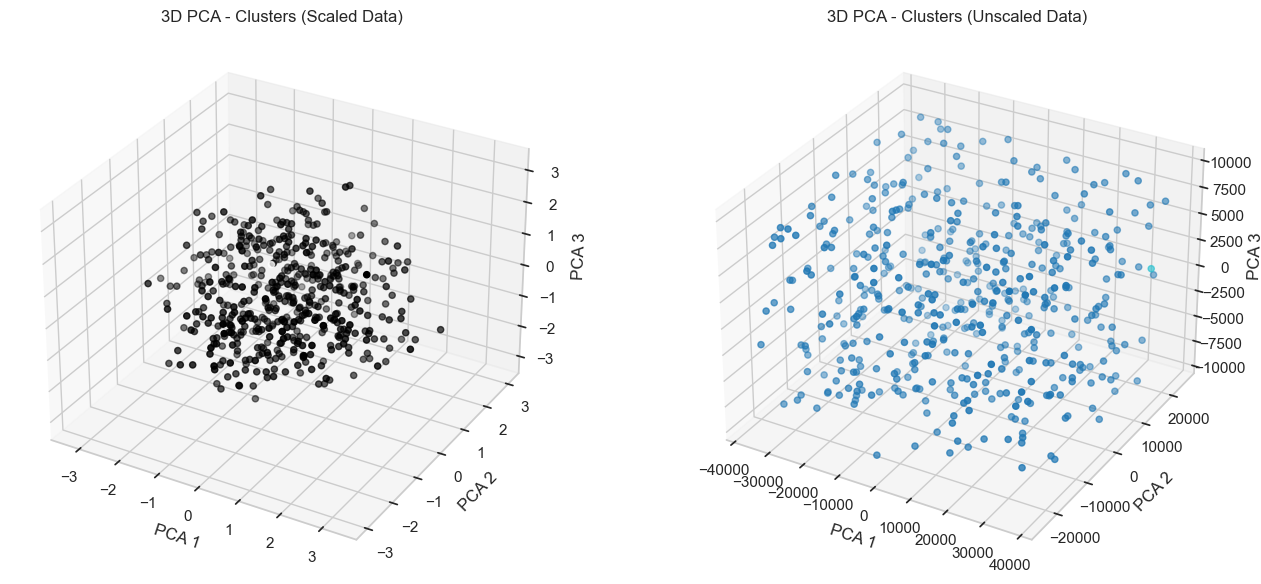

In [68]:
# 3D untuk visualisasi ---
pca_3d = PCA(n_components=3)
scaled_3d = pca_3d.fit_transform(df_scaled)
unscaled_3d = pca_3d.fit_transform(df_unscaled[numeric_cols])

fig = plt.figure(figsize=(14, 6))

# Scaled data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(scaled_3d[:, 0], scaled_3d[:, 1], scaled_3d[:, 2], c=df['Cluster_Scaled'], cmap='tab10')
ax1.set_title("3D PCA - Clusters (Scaled Data)")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")
ax1.set_zlabel("PCA 3")

# Unscaled data
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(unscaled_3d[:, 0], unscaled_3d[:, 1], unscaled_3d[:, 2], c=df['Cluster_Unscaled'], cmap='tab10')
ax2.set_title("3D PCA - Clusters (Unscaled Data)")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_zlabel("PCA 3")

plt.tight_layout()
plt.show()

Hasilnya lebih bagus jika scaled.

## Part D – Segmentation & Managerial Implication

1. Comparison of Models (Scaled vs Unscaled)
Based on silhouette scores and dendrogram observations, the scaled data model provides clearer and more interpretable clusters. Without scaling, features like Income or Credit_Card_Limit dominate the distance calculations because of their larger numeric ranges. Standardizing ensures all numeric features contribute equally to the clustering, resulting in more balanced segmentation.

2. Cluster Analysis and Interpretation
From hierarchical clustering on the scaled dataset, three main clusters emerge:

Cluster 0: Young customers with medium income, moderate Transaction_Count, high Online_Activity but lower Customer_Satisfaction. Likely digitally active but price-sensitive.

Cluster 1: Older customers with high income, high Balance and Credit_Score, and long tenure with the bank (Years_with_Bank). Strong loyalty, valuable for premium products.

Cluster 2: Middle-aged customers with moderate income, medium Purchase_Frequency and Loan_Approval_Amount. Engagement is moderate, may need more targeted incentives.

3. Managerial Recommendations

Cluster 0: Focus on digital campaigns, app notifications, and personalized online offers. Encourage use of credit card and small loans to increase engagement.

Cluster 1: Target for premium banking products, wealth management services, and loyalty programs. Retention is key as they are high-value customers.

Cluster 2: Provide educational campaigns, bundled products, and incentives to boost Purchase_Frequency and Customer_Satisfaction.

Overall Recommendation: The bank should prioritize strategies from the scaled model, using the cluster insights to design customized marketing, retention plans, and product offerings.